#**LAB Assignment - 6**

##**Reliance India stock from 16th October 2023 to 16th October 2024**

In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess data
df = pd.read_csv('/content/RELI Historical Data.csv')

In [3]:
# Convert 'Date' column to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

<ipython-input-3-353365085a67>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Check for null values and data types
df.columns
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


In [5]:
# Clean 'Price' column: Remove commas and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [6]:
# Verify conversion
print(df['Price'].head())

249    2344.05
248    2355.25
247    2324.00
246    2306.15
245    2299.10
Name: Price, dtype: float64


##**Plot the raw stock price data for the period specified (16th October 2023 to 16th October 2024).**

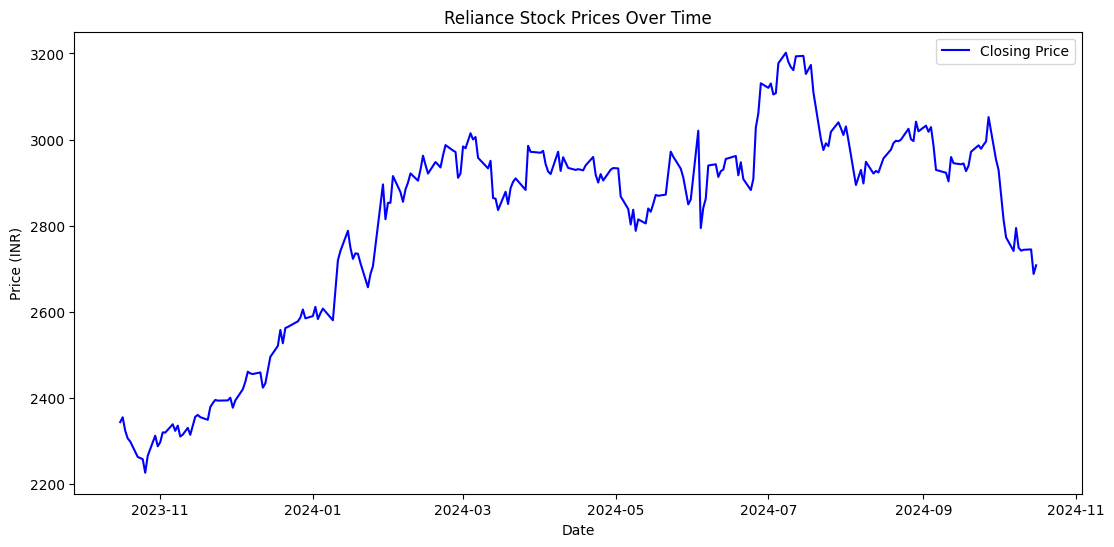

In [18]:
# Plot raw stock data
plt.figure(figsize=(13,6))
plt.plot(df['Date'], df['Price'], label='Closing Price', color='blue')
plt.title('Reliance Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

##**Simple Moving Average (SMA)**

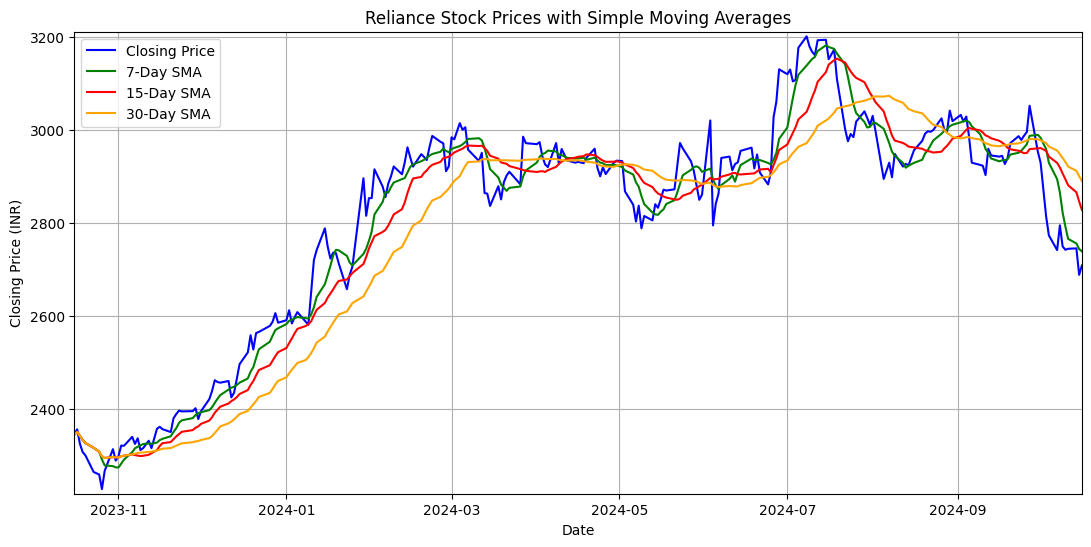

In [19]:
# Simple Moving Average (SMA) function
def calculate_sma(days, color, label):
    sma = df['Price'].rolling(window=days, min_periods=1).mean()
    plt.plot(df['Date'], sma, label=label, color=color)

# Plotting raw data with SMAs
plt.figure(figsize=(13,6))
plt.plot(df['Date'], df['Price'], label='Closing Price', color='blue')
calculate_sma(7, 'green', '7-Day SMA')
calculate_sma(15, 'red', '15-Day SMA')
calculate_sma(30, 'orange', '30-Day SMA')

# Enhance visibility
plt.grid(True)
plt.xlim([df['Date'].min(), df['Date'].max()])
plt.ylim([df['Price'].min() - 10, df['Price'].max() + 10])

# Finalize plot appearance
plt.title('Reliance Stock Prices with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

##**Centered Moving Average (CMA)**

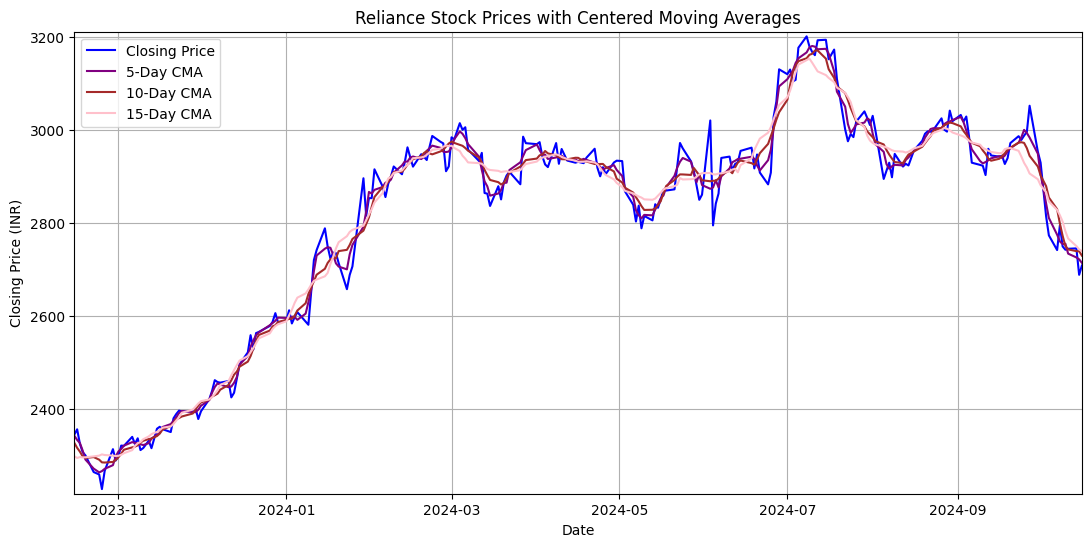

In [23]:
# Centered Moving Average (CMA) function
def calculate_cma(days, color, label):
    cma = df['Price'].rolling(window=days, center=True, min_periods=1).mean()
    plt.plot(df['Date'], cma, label=label, color=color)

# Plot CMAs
plt.figure(figsize=(13,6))
plt.plot(df['Date'], df['Price'], label='Closing Price', color='blue')
calculate_cma(5, 'purple', '5-Day CMA')
calculate_cma(10, 'brown', '10-Day CMA')
calculate_cma(15, 'pink', '15-Day CMA')

# Enhance visibility
plt.grid(True)
plt.xlim([df['Date'].min(), df['Date'].max()])
plt.ylim([df['Price'].min() - 10, df['Price'].max() + 10])

plt.title('Reliance Stock Prices with Centered Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()


##**Weighted Moving Average (WMA)**

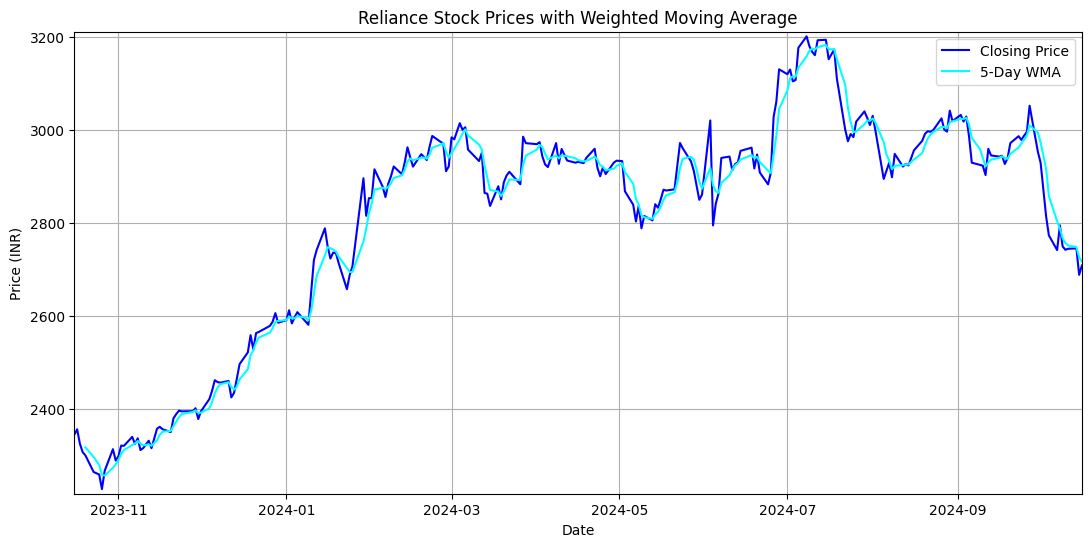

In [25]:
# Weighted Moving Average (WMA) function
def calc_wma(prices, weights):
    return np.convolve(prices, weights[::-1], 'valid') / sum(weights)

# Define weights for WMA
wts = np.array([1, 2, 3, 4, 5])

# Apply WMA calculation
weighted_avg = calc_wma(df['Price'], wts)

# Adjust dates to match WMA length
adjusted_dates = df['Date'][len(df['Date']) - len(weighted_avg):]

# Plot raw data with WMA
plt.figure(figsize=(13,6))
plt.plot(df['Date'], df['Price'], label='Closing Price', color='blue')
plt.plot(adjusted_dates, weighted_avg, label='5-Day WMA', color='cyan')

# Enhance visibility
plt.grid(True)
plt.xlim([df['Date'].min(), df['Date'].max()])
plt.ylim([df['Price'].min() - 10, df['Price'].max() + 10])

plt.title('Reliance Stock Prices with Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()